# Music genre prediction

**Описание задачи**

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса. Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача - разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

В ходе работы пройдите все основные этапы полноценного исследования:

*  загрузка и ознакомление с данными
*  предварительная обработка
*  полноценный разведочный анализ
*  разработка новых синтетических признаков
*  проверка на мультиколлинеарность
*  отбор финального набора обучающих признаков
*  выбор и обучение моделей
*  итоговая оценка качества предсказания лучшей модели
*  анализ важности ее признаков

**ВАЖНО**  
Необходимо реализовать решение с использованием технологии `pipeline` (из библиотеки `sklearn`)

**ОЖИДАЕМЫЙ РЕЗУЛЬТАТ**

* Оформленный репозиторий на GitHub (ноутбук с исследованием + код приложения)
* Развернутое web-приложение (с использованием библиотеки Streamlit)

## Участники проекта, репозиторий, приложение

Участники: Храменков Я.С.

Репозиторий: https://github.com/Yar435/ML_group_project/upload/main

## Импорт библиотек, установка констант

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import re
from langdetect import detect, LangDetectException
import os

In [2]:
TRAIN = "https://www.dropbox.com/scl/fi/5zy935lqpaqr9lat76ung/music_genre_train.csv?rlkey=ccovu9ml8pfi9whk1ba26zdda&dl=1"
TEST = "https://www.dropbox.com/scl/fi/o6mvsowpp9r3k2lejuegt/music_genre_test.csv?rlkey=ac14ydue0rzlh880jwj3ebum4&dl=1"

In [3]:
RANDOM_STATE = 42
TEST_SIZE = 0.10

## Загрузка и обзор данных

In [4]:
train = pd.read_csv(TRAIN)
test = pd.read_csv(TEST)

In [5]:
train

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.48000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.24300,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.22800,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.05580,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.22700,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,47396.0,O Pato,0.71900,0.725,-1.0,0.483,0.000000,NaN,0.0797,-13.314,Minor,0.0438,87.413,4-Apr,0.942,Jazz
20390,44799.0,Mt. Washington,0.19000,0.482,198933.0,0.362,0.005620,F#,0.0913,-10.358,Minor,0.0299,76.879,4-Apr,0.174,Rock
20391,33350.0,Original Prankster,0.00061,0.663,220947.0,0.886,0.000025,D,0.2840,-4.149,Major,0.0358,146.803,4-Apr,0.942,Alternative
20392,77920.0,4Peat,0.00310,0.914,162214.0,0.515,0.000000,C#,0.1050,-9.934,Major,0.3560,150.016,4-Apr,0.215,Rap


**Описание полей данных**

`instance_id` - уникальный идентификатор трека  
`track_name` - название трека  
`acousticness` - акустичность  
`danceability` - танцевальность  
`duration_ms` -продолжительность в милисекундах  
`energy` - энергичность  
`instrumentalness` - инструментальность  
`key` - тональность  
`liveness` - привлекательность  
`loudness` - громкость  
`mode` - наклонение  
`speechiness` - выразительность  
`tempo` - темп  
`obtained_date` - дата загрузки в сервис  
`valence` - привлекательность произведения для пользователей сервиса  
`music_genre` - музыкальный жанр

## Предварительная обработка данных

In [6]:
# pip install notebook

In [7]:
# объявляем три синтетических признака

# Функция для определения языка строки
# def detect_language(text):
#     try:
#         return detect(text)
#     except LangDetectException:
#         return 'unknown'
#
# train['trackname_language'] = train['track_name'].apply(detect_language)
#
# train.to_csv('lang.csv', index=False)
language = pd.read_csv('lang_503921.csv')
train['trackname_language'] = language['trackname_language']

regex = re.compile('[\u4e00-\u9fff\u3040-\u30ff\uac00-\ud7af]+')

def contains_ideograph(text):
    bool_num = bool(regex.search(text))
    if bool_num:
        return 1
    else:
        return 0

train['contains_ideograph'] = train['track_name'].apply(contains_ideograph)
test['contains_ideograph'] = test['track_name'].apply(contains_ideograph)

train['track_name'] = train['track_name'].apply(lambda x: len(x))
test['track_name'] = test['track_name'].apply(lambda x: len(x))

In [8]:
# избавляемся от выбросов в duration_ms (-1.0)

train_filtered = train[train['duration_ms'] != -1.0]
test_filtered = test[test['duration_ms'] != -1.0]

duration_plus_median_train = train_filtered['duration_ms'].median()
duration_plus_median_trtest = test_filtered['duration_ms'].median()

train['duration_ms'].mask(train['duration_ms'] == -1.0, duration_plus_median_train, inplace=True)
test['duration_ms'].mask(test['duration_ms'] == -1.0, duration_plus_median_trtest, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11020\2001086878.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['duration_ms'].mask(train['duration_ms'] == -1.0, duration_plus_median_train, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11020\2001086878.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [9]:
# Удалим ненужный столбец 'obtained_date', так как он не добавляет полезной информации для предсказания жанра
train.drop(columns=['obtained_date'], inplace=True)
test.drop(columns=['obtained_date'], inplace=True)

In [10]:
# Разделим тренировочные данные на тренировочную и валидационную выборки
X = train.drop(columns=['instance_id', 'music_genre'])
y = train['music_genre']

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

In [12]:
# Подготовим тестовые данные(для использования в будущем)
X_test = test.drop(columns=['instance_id'])

## Разведочный анализ

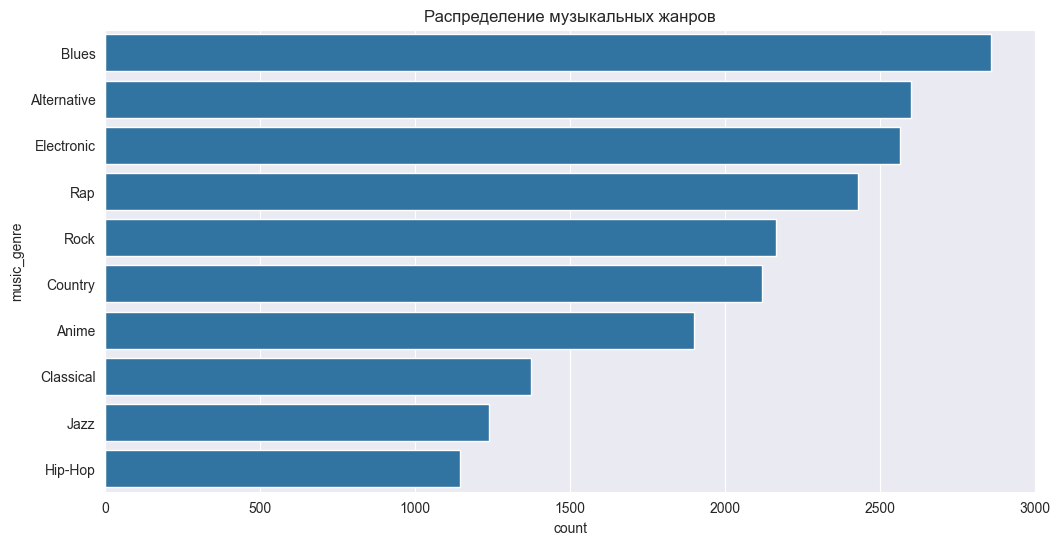

In [13]:
# Анализ целевой переменной (music_genre)
plt.figure(figsize=(12, 6))
sns.countplot(y=train['music_genre'], order=train['music_genre'].value_counts().index)
plt.title('Распределение музыкальных жанров')
plt.show()

<Figure size 1600x1000 with 0 Axes>

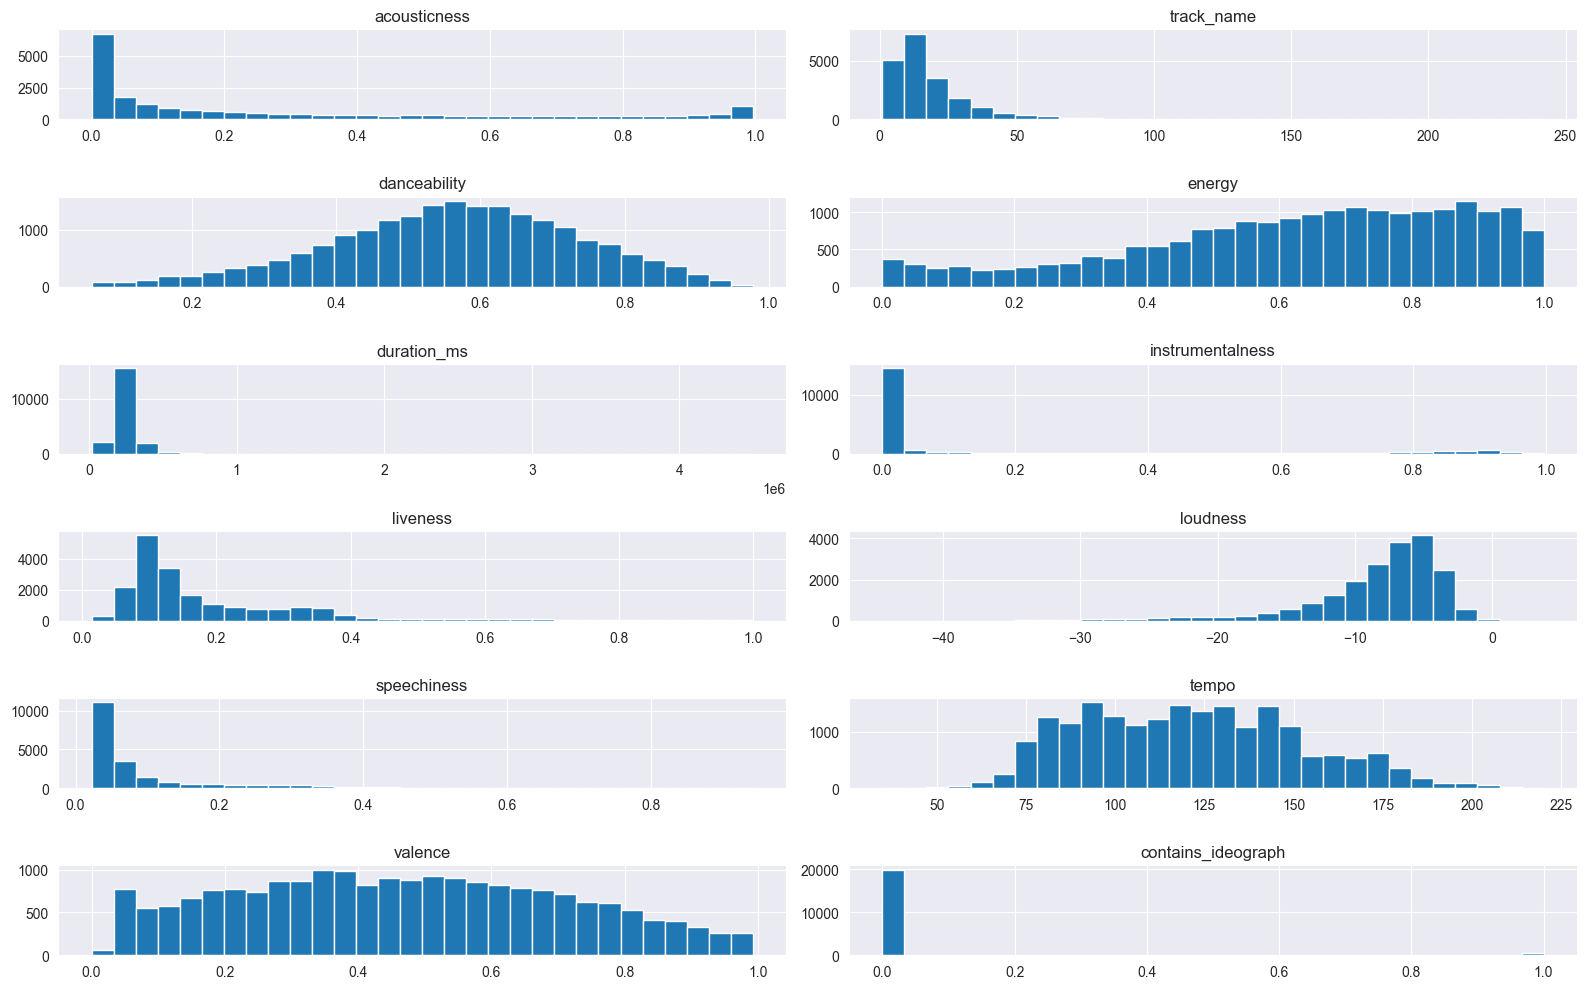

In [14]:
numerical_features = ['acousticness', 'track_name', 'danceability',
                      'energy', 'duration_ms', 'instrumentalness',
                      'liveness', 'loudness', 'speechiness', 'tempo',
                      'valence', 'contains_ideograph']

plt.figure(figsize=(16, 10))
train[numerical_features].hist(bins=30, figsize=(16, 10), layout=(6, 2))
plt.tight_layout()
plt.show()

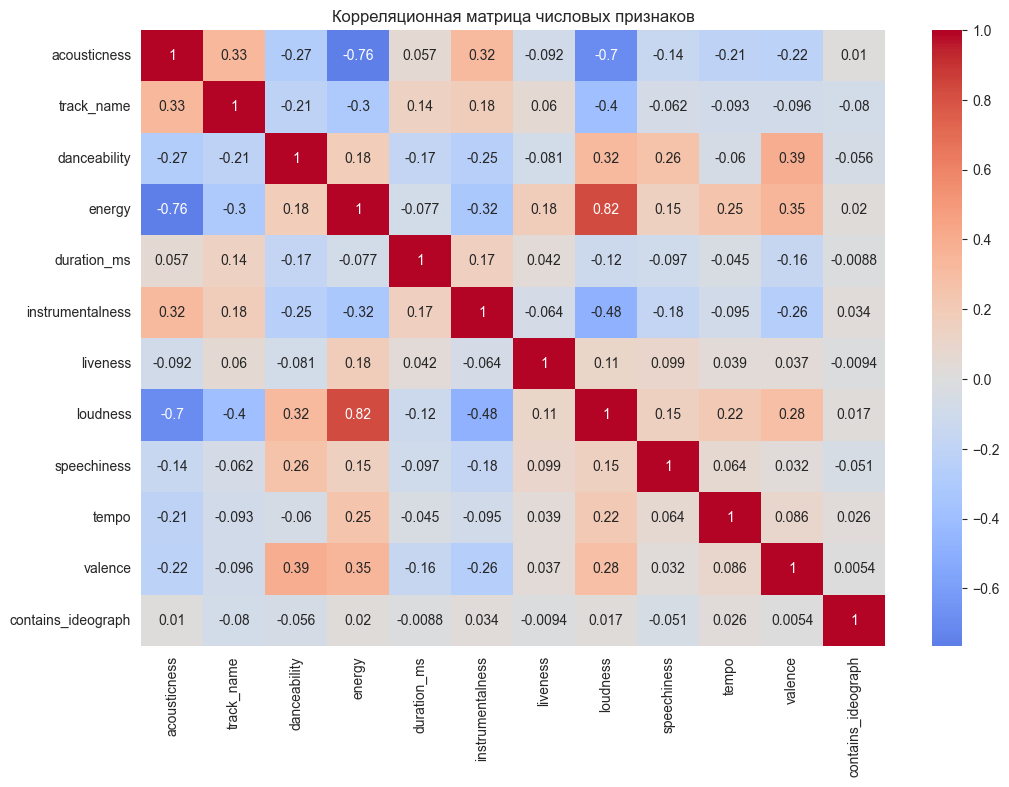

In [15]:
# Корреляционная матрица
plt.figure(figsize=(12, 8))
corr_matrix = train[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица числовых признаков')
plt.show()

In [16]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
#
# train[numerical_features] = train[numerical_features].fillna(train[numerical_features].median())
#
# df_with_constant = add_constant(train[numerical_features])
#
# # Расчет VIF для каждого признака
# vif_data = pd.DataFrame()
# vif_data["feature"] = df_with_constant.columns
#
# vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i)
#                     for i in range(df_with_constant.shape[1])]
#
# print(vif_data)

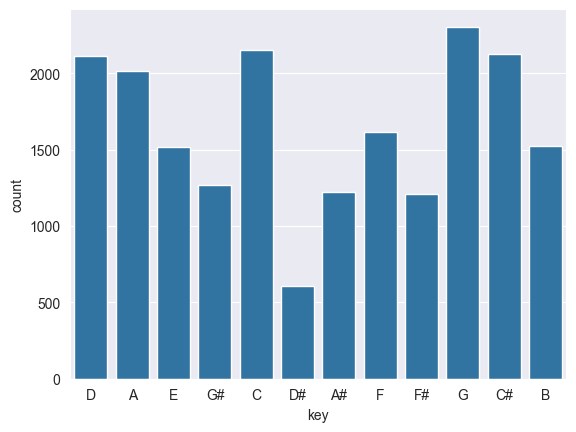

In [17]:
# 4. Анализ категориальных признаков
sns.countplot(x='key', data=train)
plt.show()

# sns.countplot(x='mode', data=train)
# plt.show()

In [18]:
# ['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
# ['danceability', 'speechiness', 'valence']
# for feature in ['key', 'mode', 'trackname_language']:
#     plt.figure(figsize=(12, 6))
#     sns.boxplot(x='music_genre', y=feature, data=train, palette="Set3")
#     plt.xticks(rotation=90)
#     plt.title(f'{feature.title()} в зависимости от музыкального жанра')

## Работа с признаками

In [19]:
# Преобразователь для числовых признаков: заполняем пропуски средним значением и масштабируем
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [20]:
# Преобразователь для категориальных признаков: заполняем пропуски значением моды и применяем One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [21]:
# Объединяем обработку для разных типов признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['acousticness', 'track_name', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'contains_ideograph']),
        ('cat', categorical_transformer, [ 'trackname_language'])
    ])

## Выбор и обучение моделей

In [22]:
# Создаем конвейер, включающий предварительную обработку и обучение модели
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
))
])

In [23]:
# Обучение модели
model_pipeline.fit(X_train, y_train)

# Прогнозирование
y_pred = model_pipeline.predict(X_val)

# os.rename("lang.csv", "lang_"+ str(accuracy*1000000).split('.')[0] +".csv")

## Оценка качества

In [24]:
# Оценка точности
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_val, y_pred))

Accuracy: 0.5039
              precision    recall  f1-score   support

 Alternative       0.37      0.38      0.37       260
       Anime       0.70      0.55      0.62       190
       Blues       0.44      0.56      0.49       286
   Classical       0.83      0.84      0.83       137
     Country       0.45      0.57      0.50       212
  Electronic       0.61      0.69      0.65       256
     Hip-Hop       0.44      0.10      0.16       115
        Jazz       0.46      0.27      0.34       124
         Rap       0.50      0.74      0.60       243
        Rock       0.29      0.13      0.18       217

    accuracy                           0.50      2040
   macro avg       0.51      0.48      0.47      2040
weighted avg       0.49      0.50      0.48      2040



## Анализ важности признаков модели

In [25]:
# Доступ к модели
model = model_pipeline.named_steps['classifier']

transformed_feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=model_pipeline.feature_names_in_)

# Получение важности признаков
feature_importances = model.feature_importances_

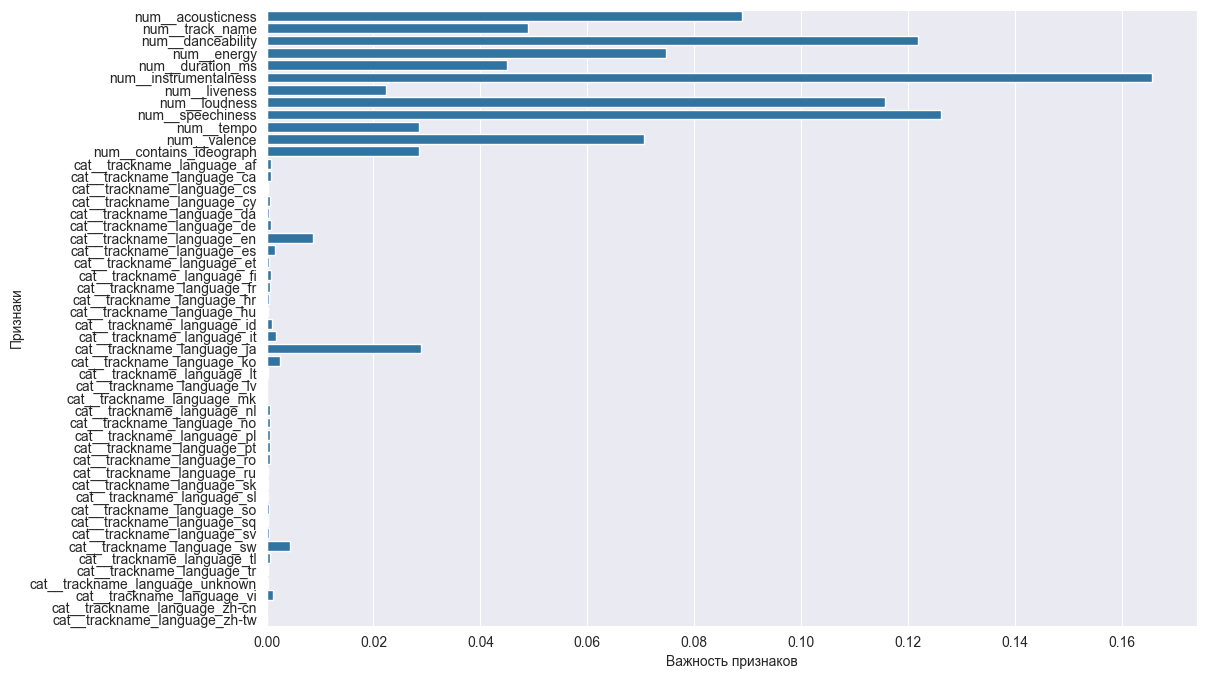

In [26]:
# Визуализация для случая без полиномиальных признаков
features = transformed_feature_names
importance_df = pd.DataFrame({
    'features': features,
    'importance': feature_importances
})

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='features', data=importance_df)
plt.xlabel("Важность признаков")
plt.ylabel("Признаки")
plt.show()

